In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/AB_NYC_2019.csv'
df = pd.read_csv(path)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
# remove  column last_review
df_clean = df.drop(columns=['last_review'],axis=1)
df_clean

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [ ]:
#finding missing host name
missing_host_name_id=df_clean[df_clean['host_name'].isna()]['host_id']
index_value=list(missing_host_name_id.index)
k=0
for i in missing_host_name_id:
  ref_host_name=df_clean[(df_clean['host_id']==i) & (df_clean['host_name'].notna())]['host_name']
  df_clean.iloc[index_value[k]]['host_name']=ref_host_name
  k = k+1

<ipython-input-4-c38a1827dc5e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.iloc[index_value[k]]['host_name']=ref_host_name


In [ ]:
#remove column host_name
df_clean.dropna(subset = ['host_name'], inplace=True)

In [ ]:
#find the missing reviews per month
missing_host_name_id=df_clean[df_clean['reviews_per_month'].isna()]['host_id']
index_value=missing_host_name_id.index
k=0
for i in missing_host_name_id:
  #print(i)
  df_clean.loc[index_value[k],'reviews_per_month']=df_clean[df_clean['host_id']==i]['reviews_per_month'].mean()
  k = k +1

In [ ]:
#fill reviews_per_month with 0
from sklearn.impute import SimpleImputer
imputer_m=SimpleImputer(strategy='constant',fill_value=0)
df_clean['reviews_per_month']=imputer_m.fit_transform(df_clean[['reviews_per_month']])

In [ ]:
df_clean.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
#removing the column with 'name' as it doesnot impact the model
df_clean.drop(columns=['name'],inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_clean['neighbourhood'] = le.fit_transform(df_clean['neighbourhood'])

In [ ]:
X=df_clean.drop(columns=['id','host_id','host_name','price','neighbourhood','availability_365'])
y=df_clean['price']

In [ ]:
X

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,Brooklyn,40.64749,-73.97237,Private room,1,9,0.210,6
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,45,0.380,2
2,Manhattan,40.80902,-73.94190,Private room,3,0,0.000,1
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,270,4.640,1
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,9,0.100,1
...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,2,0,0.650,2
48891,Brooklyn,40.70184,-73.93317,Private room,4,0,0.000,2
48892,Manhattan,40.81475,-73.94867,Entire home/apt,10,0,0.000,1
48893,Manhattan,40.75751,-73.99112,Shared room,1,0,6.984,6


In [ ]:
y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48874, dtype: int64

In [ ]:
#change categorical data into numeric
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0,3])], remainder='passthrough')
x = np.array(ct.fit_transform(X))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

(0.0, 500.0)

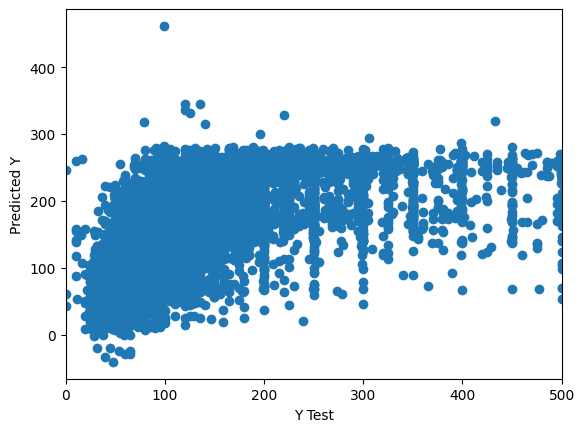

In [ ]:
prediction=lreg.predict(X_test)

plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0,500)

In [ ]:
#using polynomial regression
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=3)
x_poly=pf.fit_transform(x)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=0)

In [ ]:
lreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
prediction=lreg.predict(X_test)

(0.0, 500.0)

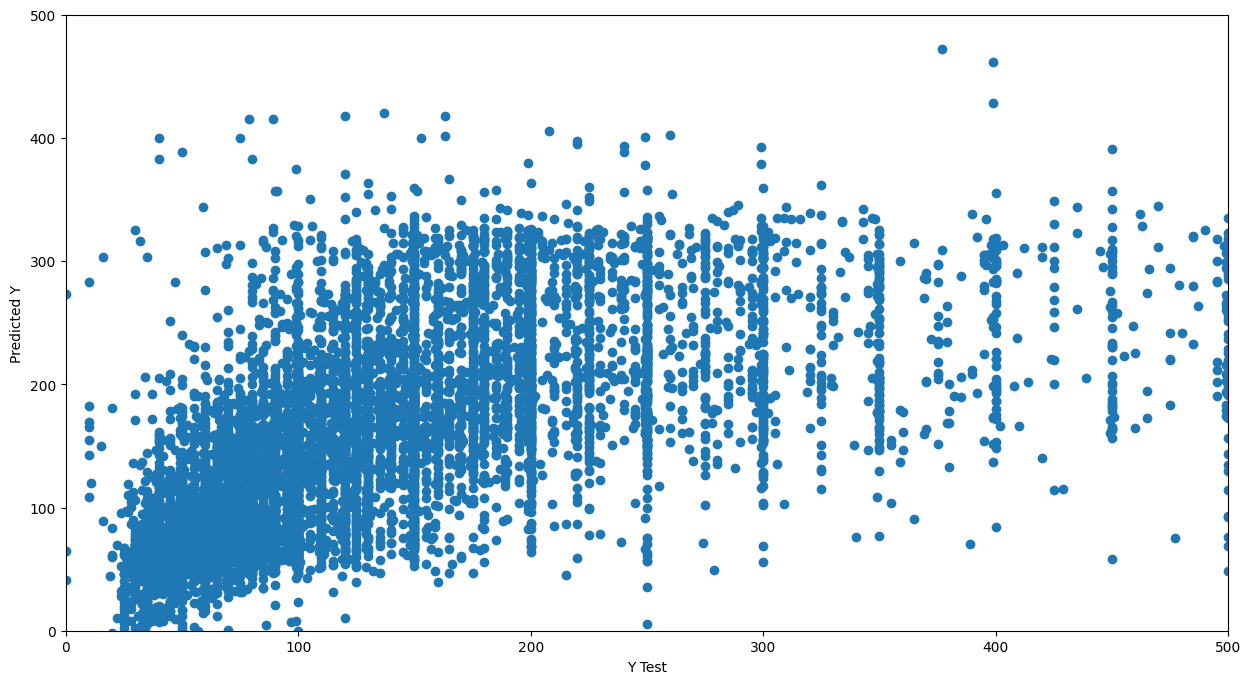

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0,500)
plt.ylim(0,500)